# KIKS
Sint-Bavohumaniora, KA Etterbeek, UGent, Plantentuin Meise, Accenture

# Hoogte bomen - grootte en densiteit stomata - Amazonewoud

Bron: Camargo, Miguel Angelo Branco, & Marenco, Ricardo Antonio. (2011). Density, size and distribution of stomata in 35 rainforest tree species in Central Amazonia. Acta Amazonica, 41(2), 205-212. https://dx.doi.org/10.1590/S0044-59672011000200004 en via e-mail.

Paleoklimatologen hebben aangetoond dat er een verband is tussen het aantal en de grootte van stomata op bladeren en het CO<sub>2</sub>-gehalte in de atmosfeer toen deze planten groeiden.<br>
Vandaag de dag wordt er wereldwijd door wetenschappers onderzoek gedaan naar de huidmondjes op bladeren van nu. <br> Bij sommige planten ontdekte men verschillen in de stomata van bladeren ontsproten in lente tegenover die in de zomer. Bij andere planten stelde men verschillen vast tussen bladeren in de kruin van een plant en de beschaduwde bladeren onderaan in de plant.<br>
Vast staat dat het aantal en de grootte van de huidmondjes onderhevig is aan omgevingsfactoren.<br> <br>
Onderzoekers uit Brazilië vroegen zich het volgende af:<br>
**Is er een verband tussen het aantal huidmondjes op bladeren in de kruin van een boom en de hoogte van de boom?**<br>
Om dit te onderzoeken gebruikten ze data verzameld in het Amazonewoud.

## De nodige modules importeren

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## 1. Inlezen van de data

In [2]:
amazone = pd.read_csv("amazone.dat", header=None)  # in te lezen tabel heeft geen hoofding

## 2. Tonen van de ingelezen data

In [3]:
print(amazone)

                                              0       1      2      3
0   Anisophyllea manausensis Pires & W. A. Rodr  271.10  17.72  24.19
1                           Antonia ovata Pohl.  287.93  17.18  16.85
2                    Astronium le-cointei Ducke  652.11  12.56  25.80
3                        Couratari tauari Berg.  234.70  15.73  16.66
4                  Duroia kotchubaeiodissteyerm  219.74  16.78  23.41
5                     Ecclinusa guianensis Eyma  316.56  10.70  30.05
6    Eschweileira bracteosa (poepp. Beng) Miers  657.54  13.47  23.78
7     Eschweilera apiculata (miers) a. c. smith  442.01  14.29  29.64
8      Eschweilera coriacea (DC.) Mart. ex Berg  411.20  12.45  23.15
9          Eschweilera parviflora (Aubl.) Miers  500.10   8.25  25.35
10                Ferdinandusa ellipttica Pohl.  204.59  23.10  27.50
11                      Geissospermum argenteum  477.60  18.80  22.09
12                    Inga umbratica poepp endl  395.70  14.58  19.40
13              Jaca

In [4]:
# deze tabel: matrix met 35 rijen en 4 kolommen
# [:,0] betekent: alles van de 0de kolom
# eerste kolom: naam plant, tweede kolom: densiteit stomata, derde kolom: lengte stomata, vierde kolom: hoogte boom
# shape komt ongeveer overeen met aantal rijen en kolommen in een matrix, waarbij 1 niet wordt vermeld

Het is mogelijk enkel het begin of enkel het laatste deel van de tabel te tonen.

In [5]:
amazone.head()

,0,1,2,3
0,Anisophyllea manausensis Pires & W. A. Rodr,271.10,17.72,24.19
1,Antonia ovata Pohl.,287.93,17.18,16.85
2,Astronium le-cointei Ducke,652.11,12.56,25.80
3,Couratari tauari Berg.,234.70,15.73,16.66
4,Duroia kotchubaeiodissteyerm,219.74,16.78,23.41


In [6]:
amazone.tail()

,0,1,2,3
30,Protium Klugii Macbr,589.35,11.04,18.87
31,Qualea acuminata spruce Warm,846.13,15.39,33.04
32,Rinorea paniculata (Mart) O. ktz,175.43,20.58,19.49
33,Scleronema micranthum,526.20,17.06,31.60
34,Swartzia ingifolia Ducke,543.88,12.41,27.79


## 3. Sorteren

In [7]:
# sorteren op hoogte van de bomen
amazone.sort_values(3, inplace=True)    

Door het gebruik van `inplace` wordt de ordening in `amazone` vastgelegd.

## 4. De data weergeven in puntenwolk 

Beschouw elk kenmerk.

In [8]:
x = amazone.iloc[:,3].values    # hoogte boom
print(x)
print(len(x))
print(x.shape)

[16.66 16.85 17.87 18.87 19.22 19.4  19.49 20.02 20.63 22.09 22.31 22.8
 23.15 23.41 23.66 23.78 24.19 24.55 24.86 25.2  25.35 25.39 25.8  26.37
 27.5  27.63 27.79 29.64 29.7  30.05 31.28 31.6  32.39 33.04 35.96]
35
(35,)


De bomen staat gesorteerd van klein naar groot!

In [9]:
y1 = amazone.iloc[:,1].values    # densiteit huidmondjes
print(y1)
print(y1.shape)

[234.7  287.93 110.29 589.35 367.08 395.7  175.43 285.64 458.01 477.6
 580.93 588.5  411.2  219.74 314.11 657.54 271.1  150.06 284.57 277.83
 500.1  540.51 652.11 405.96 204.59 212.16 543.88 442.01 389.81 316.56
 280.64 526.2  489.16 846.13 569.38]
(35,)


In [10]:
y2 = amazone.iloc[:,2].values    # grootte huidmondjes
print(y2)
print(y2.shape)

[15.73 17.18 18.67 11.04 10.11 14.58 20.58 21.18 10.63 18.8   8.97  8.46
 12.45 16.78 10.92 13.47 17.72 21.17 17.5  20.67  8.25 13.88 12.56 20.88
 23.1  23.57 12.41 14.29 18.43 10.7   9.33 17.06  8.92 15.39 10.18]
(35,)


Beschouw telkens twee kenmerken uit de tabel. Misschien bestaat er een verband tussen.

### Drie puntenwolken

Er is een gekende corrleatie tussen het aantal huidmondjes en de grootte ervan. Is dat hier ook te zien?

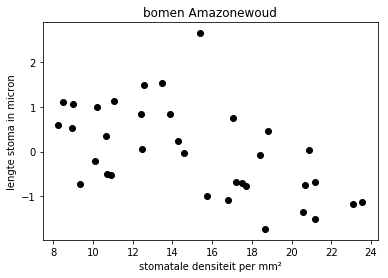

In [43]:
# lengte t.o.v.densiteit
plt.scatter(y2, y1, color="black", marker="o")
plt.title("bomen Amazonewoud")
plt.xlabel("stomatale densiteit per mm²")
plt.ylabel("lengte stoma in micron")
plt.show()

In [12]:
# verband tussen de lengte en de densiteit van de stomata?
# correlatiecoefficiênt R bepalen (ligt tussen -1 en 1, hoe dichter bij 0, hoe slechter de samenhang)
np.corrcoef(y2, y1)[0,1]

-0.5473323361748897

Matige samenhang!

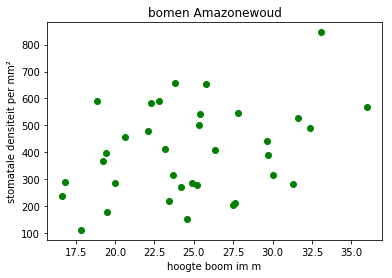

In [14]:
# densiteit t.o.v. hoogte
plt.scatter(x, y1, color="green", marker="o")
plt.title("bomen Amazonewoud")
plt.xlabel("hoogte boom im m")
plt.ylabel("stomatale densiteit per mm²")
plt.show()

In [17]:
# in hoeverre is er een verband tussen de hoogte van de boom en de densiteit van de stomata? 
np.corrcoef(x, y1)[0,1]

0.3469699169562766

Zwakke samenhang!

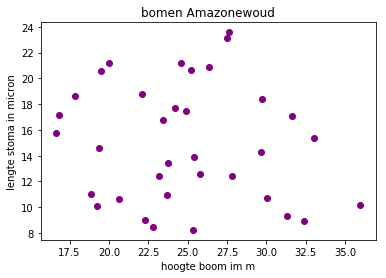

In [16]:
# lente t.o.v. hoogte
plt.scatter(x, y2, color="purple", marker="o")
plt.title("bomen Amazonewoud")
plt.xlabel("hoogte boom im m")
plt.ylabel("lengte stoma in micron")    # micron = micrometer
plt.show()

In [18]:
# in hoeverre is er een verband tussen de hoogte van de boom en de grootte van de stomata? 
np.corrcoef(x, y2)[0,1]

-0.13106168762905604

Heel, heel zwakke samenhang!

## 5. Onderzoeksvraag: is er samenhang tussen lengte stomata en hoogte boom?
### Regressielijn?

## 5.1 Methode uit de wiskundeles (dezelfde methode als de Braziliaanse onderzoekers)

*Rekenen met vrij grote getallen leidt al snel tot nog grotere getallen en tot numerieke instabiliteit, dat is een van de redenen waarom de data worden gestandaardiseerd. Standaardiseren van variabelen houdt in dat men de variabelen op zo'n manier herschaalt dat men variabelen van bv. een verschillende grootteorde of in een verschillende eenheid met elkaar kan vergelijken of in verband brengen.  De correlatie tussen bivariate gegevens bv. kan men visueel inschatten door de overeenkomstige puntenwolk te bekijken, de vorm hiervan is echter maar betrouwbaar als de gegevens gestandaardiseeerd zijn. *<br><br>
De data worden als volgt **gestandaardiseerd**: van elke gegeven wordt het gemiddelde afgetrokken en vervolgens wordt het resultaat gedeeld door de standaardafwijking. <br>Men berekent m.a.w. van alle data de Z-score. Zo komen de meeste gegevens terecht tussen -1 en 1. <br>
<br>

In [38]:
x = np.array(amazone.iloc[:, 3])
y1 = amazone.iloc[:,1]

# gemiddelde en standaardafwijking van data
x_gem = np.mean(x)
x_std = np.std(x)
y1_gem = np.mean(y1)
y1_std = np.std(y1)

# data standaardiseren
x = (x - x_gem)/x_std
y1 = (y1 - y1_gem)/y1_std

# juiste formaat voor regressie in Python
X= x[:, np.newaxis]  

In [26]:
# lineaire regressie
rechte = LinearRegression()
rechte.fit(X, y1)

# metrics
print("R² voor de rechte: %.3f" % r2_score(y1, rechte.predict(X)))
print("Gemiddelde kwadratische afwijking voor de rechte: %.2f"% mean_squared_error(y1, rechte.predict(X)))

R² voor de rechte: 0.120
Gemiddelde kwadratische afwijking voor de rechte: 0.88


In [25]:
np.corrcoef(x, y1)[0,1]**2       # R²

0.12038812327264548

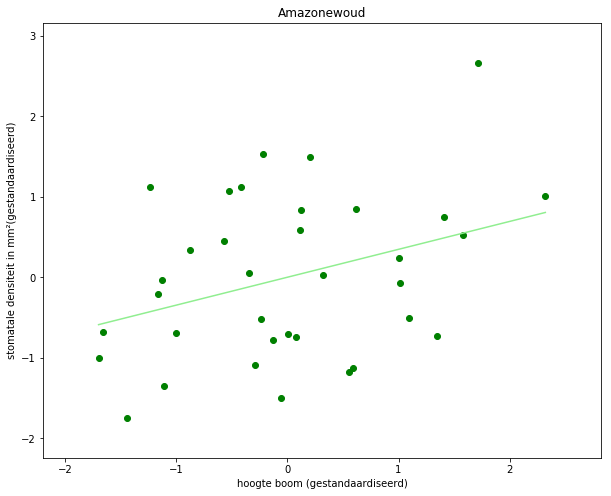

In [30]:
# grafische voorstelling
plt.figure(figsize=(10, 8))

plt.xlim(x.min()-0.5, x.max()+0.5)
plt.ylim(y1.min()-0.5, y1.max()+0.5)
plt.title("Amazonewoud")
plt.xlabel("hoogte boom (gestandaardiseerd)")
plt.ylabel("stomatale densiteit in mm²(gestandaardiseerd)")

plt.scatter(X, y1, color="green", marker="o")
plt.plot(X, rechte.predict(X), color="lightgreen")

plt.show()

In [33]:
# vergelijking van de rechte zonder standaardisatie
print("De vergelijking van de rechte: y =", 
      rechte.coef_[0]*y1_std/x_std, "x +", rechte.intercept_ * y1_std + y1_gem - rechte.coef_[0] * x_gem *y1_std/x_std)

De vergelijking van de rechte: y = 12.068440527266908 x + 102.14484005910538


R² en deze vergelijking komen overeen met de resultaten van de Braziliaanse onderzoekers (zij werkten met Excel).

## 5.2 Methode uit Machinaal Leren (met trainingdata en testdata)

We splitsen de data op in trainingdata en testdata.<br> *De trainingdata worden gebruikt om een wiskundig model op te stellen. <br>Met de testdata wordt nagegaan of het model goed omgaat met nieuwe data.*

In [35]:
# data voorbereiden

In [53]:
# trainingdata
x_train = np.array(amazone.iloc[0:29,3])
y1_train = amazone.iloc[0:29,1]
print(x_train)
print(y1_train)

# testdata
x_test = np.array(amazone.iloc[29:,3])
y1_test = amazone.iloc[29:,1]
print(x_test)
print(y1_test)

[16.66 16.85 17.87 18.87 19.22 19.4  19.49 20.02 20.63 22.09 22.31 22.8
 23.15 23.41 23.66 23.78 24.19 24.55 24.86 25.2  25.35 25.39 25.8  26.37
 27.5  27.63 27.79 29.64 29.7 ]
3     234.70
1     287.93
21    110.29
30    589.35
17    367.08
12    395.70
32    175.43
23    285.64
15    458.01
11    477.60
28    580.93
29    588.50
8     411.20
4     219.74
16    314.11
6     657.54
0     271.10
22    150.06
25    284.57
26    277.83
9     500.10
18    540.51
2     652.11
20    405.96
10    204.59
27    212.16
34    543.88
7     442.01
13    389.81
Name: 1, dtype: float64
[30.05 31.28 31.6  32.39 33.04 35.96]
5     316.56
14    280.64
33    526.20
19    489.16
31    846.13
24    569.38
Name: 1, dtype: float64


De training- en testdata worden als volgt **gestandaardiseerd**: van elke gegeven uit de trainingdata wordt het gemiddelde van de trainingdata afgetrokken en vervolgens wordt het resultaat gedeeld door de standaardafwijking van de trainingdata. <br> 
De volledige dataset wordt op dezelfde manier gestandaardiseerd. Men doet dus net hetzelfde met de testdata: men gebruikt er ook het gemiddelde en de standaardafwijking van de **trainingdata**. <br>
<br>
*Sommige algoritmes uit Machine Learning zijn pas bruikbaar als de data gestandaardiseerd zijn, omdat die algoritmes zo opgesteld zijn.*<br>

In [54]:
# standaardiseren

# gemiddelde en standaardawijking van de trainingdata bepalen
x_train_gem = np.mean(x_train)
x_train_std = np.std(x_train)
y1_train_gem = np.mean(y1_train)
y1_train_std = np.std(y1_train)

# trainingdata standaardiseren
x_train = (x_train - x_train_gem)/x_train_std
y1_train = (y1_train - y1_train_gem)/y1_train_std

# juiste formaat
X_train = x_train[:, np.newaxis]
print(X_train)
print(y1_train)
print(X_train.shape, y1_train.shape)

# testdata standaardiseren
x_test = (x_test - x_train_gem)/x_train_std
y1_test = (y1_test - y1_train_gem)/y1_train_std

# juiste formaat
X_test = x_test[:, np.newaxis]
print(X_test)
print(y1_test)
print(X_test.shape, y1_test.shape)

[[-1.83827008]
 [-1.78525046]
 [-1.50061882]
 [-1.22156819]
 [-1.12390047]
 [-1.07367136]
 [-1.0485568 ]
 [-0.90065997]
 [-0.73043908]
 [-0.32302516]
 [-0.26163402]
 [-0.12489921]
 [-0.02723149]
 [ 0.04532167]
 [ 0.11508433]
 [ 0.1485704 ]
 [ 0.26298116]
 [ 0.36343939]
 [ 0.44994509]
 [ 0.5448223 ]
 [ 0.58667989]
 [ 0.59784192]
 [ 0.71225268]
 [ 0.87131154]
 [ 1.18663875]
 [ 1.22291533]
 [ 1.26756343]
 [ 1.7838071 ]
 [ 1.80055014]]
3    -0.941325
1    -0.597164
21   -1.745703
30    1.351680
17   -0.085417
12    0.099627
32   -1.324538
23   -0.611970
15    0.502495
11    0.629155
28    1.297240
29    1.346184
8     0.199843
4    -1.038050
16   -0.427896
6     1.792565
0    -0.705979
22   -1.488569
25   -0.618888
26   -0.662466
9     0.774630
18    1.035903
2     1.757457
20    0.165964
10   -1.136003
27   -1.087058
34    1.057691
7     0.399047
13    0.061545
Name: 1, dtype: float64
(29, 1) (29,)
[[1.89821786]
 [2.24145013]
 [2.33074633]
 [2.55119633]
 [2.73257924]
 [3.54740708]]
5    -

In [55]:
# lineaire regressie
rechte = LinearRegression()
rechte.fit(X_train, y1_train)

# metrics
print("R² voor de rechte m.b.t. de trainingdata: %.3f" % r2_score(y1_train, rechte.predict(X_train)))
print("Gemiddelde kwadratische afwijking voor de rechte m.b.t. de trainingdata: %.2f"% mean_squared_error(y1_train, rechte.predict(X_train)))

# testdata (generalisatie)
print("Gemiddelde kwadratische afwijking voor de rechte m.b.t. de testdata: %.2f"% mean_squared_error(y1_test, rechte.predict(X_test)))

R² voor de rechte m.b.t. de trainingdata: 0.034
Gemiddelde kwadratische afwijking voor de rechte m.b.t. de trainingdata: 0.97
Gemiddelde kwadratische afwijking voor de rechte m.b.t. de testdata: 1.44


rico: 0.185
y-intercept: 0.000


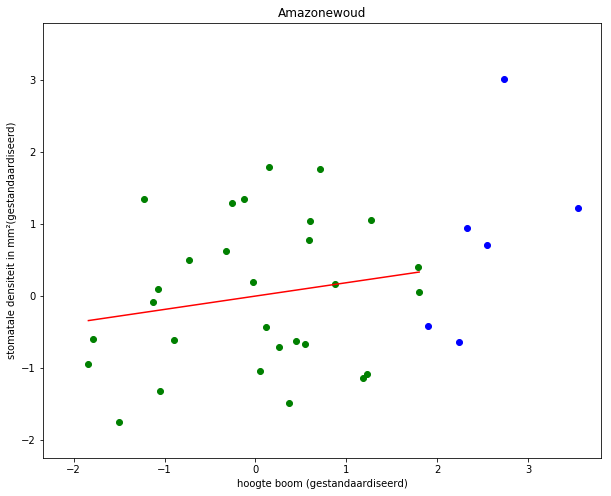

In [56]:
# grafische voorstelling
plt.figure(figsize=(10, 8))

plt.xlim(x_train.min()-0.5, x_train.max()+2)
plt.ylim(y1_train.min()-0.5, y1_train.max()+2)
plt.title("Amazonewoud")
plt.xlabel("hoogte boom (gestandaardiseerd)")
plt.ylabel("stomatale densiteit in mm²(gestandaardiseerd)")

plt.scatter(X_train, y1_train, color="green", marker="o")
plt.plot(X_train, rechte.predict(X_train), color="red")

# testdata
plt.scatter(X_test, y1_test, color="blue", marker="o")

# controle vergelijking rechte 
print("rico: %.3f" % rechte.coef_[0])
print("y-intercept: %.3f" % rechte.intercept_)
x_nieuw = np.linspace(-2, 4, 40)
x_nieuw = (x_nieuw - x_train_gem)/x_train_std
y_rechte = rechte.coef_[0]* x_nieuw + rechte.intercept_
plt.plot(x_nieuw, y_rechte, color="yellow", linestyle="dashed")

plt.show()

Interpretatie: 
Gemiddelde kwadratische afwijking voor de rechte m.b.t. de trainingdata is 0.97.
Gemiddelde kwadratische afwijking voor de rechte m.b.t. de testdata is 1.44. Deze fout is groter, dus niet zo'n goede generalisatie.<br>
Merk op dat een bepaald punt allicht beschouwd kan worden als uitschieter. Bekijk eens wat de generalisatie is zonder dit punt.

In [57]:
# vergelijking van de rechte
print("De vergelijking van de rechte: y =", rechte.coef_[0], "x +",rechte.intercept_)

De vergelijking van de rechte: y = 0.1851998164535916 x + 4.581947075007938e-16


In [58]:
# vergelijking van de rechte zonder standaardisatie
print("De vergelijking van de rechte: y =", 
      rechte.coef_[0]*y1_train_std/x_train_std, "x +",
      rechte.intercept_ * y1_train_std + y1_train_gem - rechte.coef_[0] * x_train_gem *y1_train_std/x_train_std)

De vergelijking van de rechte: y = 7.993161533203209 x + 194.46932267396758


## Zonder de uitschieter

In [63]:
# testdata zonder uitschieter
x_2_test = np.delete(x_test,4)
y1_2_test = np.array(y1_test)
y1_2_test = np.delete(y1_2_test,4)
X_2_test = x_2_test[:, np.newaxis]
print(x_2_test)
print(X_2_test)
print(y1_2_test)
print(X_2_test.shape, y1_2_test.shape)

[1.89821786 2.24145013 2.33074633 2.55119633 3.54740708]
[[1.89821786]
 [2.24145013]
 [2.33074633]
 [2.55119633]
 [3.54740708]]
[-0.41205571 -0.644298    0.94338062  0.70389692  1.22256274]
(5, 1) (5,)


In [64]:
print("Gemiddelde kwadratische afwijking voor de rechte m.b.t. de testdata: %.2f"% mean_squared_error(y1_2_test, rechte.predict(X_2_test)))

Gemiddelde kwadratische afwijking voor de rechte m.b.t. de testdata: 0.47


Dat is al heel wat beter.